In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/home/stud/Desktop/kddcup_subset.csv')

In [2]:
df['V23'].head(10)

0    1
1    2
2    1
3    2
4    3
5    4
6    5
7    6
8    7
9    8
Name: V23, dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 43 columns):
Unnamed: 0    1010 non-null int64
V1            1010 non-null int64
V2            1010 non-null object
V3            1010 non-null object
V4            1010 non-null object
V5            1010 non-null int64
V6            1010 non-null int64
V7            1010 non-null int64
V8            1010 non-null int64
V9            1010 non-null int64
V10           1010 non-null int64
V11           1010 non-null int64
V12           1010 non-null int64
V13           1010 non-null int64
V14           1010 non-null int64
V15           1010 non-null int64
V16           1010 non-null int64
V17           1010 non-null int64
V18           1010 non-null int64
V19           1010 non-null int64
V20           1010 non-null int64
V21           1010 non-null int64
V22           1010 non-null int64
V23           1010 non-null int64
V24           1010 non-null int64
V25           1010 non-null int64
V26   

In [4]:
df.describe()

,Unnamed: 0,V1,V5,V6,V7,V8,V9,V10,V11,V12,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.0,1010.0,1010.0,1010.000000,1010.0,1010.000000,...,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.0,1010.0,1010.0,1010.0
mean,1266.955446,0.358416,251.733663,4406.892079,0.0,0.0,0.0,0.001980,0.0,0.990099,...,77.951485,220.212871,0.989465,0.000198,0.091564,0.030901,0.0,0.0,0.0,0.0
std,7673.734842,7.098504,90.184655,12622.749116,0.0,0.0,0.0,0.044477,0.0,0.099059,...,86.600839,70.112604,0.100465,0.001981,0.187455,0.019332,0.0,0.0,0.0,0.0
min,1.000000,0.000000,142.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,253.250000,0.000000,217.000000,592.500000,0.0,0.0,0.0,0.000000,0.0,1.000000,...,14.000000,242.250000,1.000000,0.000000,0.010000,0.010000,0.0,0.0,0.0,0.0
50%,505.500000,0.000000,235.000000,1948.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,...,36.000000,255.000000,1.000000,0.000000,0.030000,0.040000,0.0,0.0,0.0,0.0
75%,757.750000,0.000000,271.000000,2964.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,...,122.750000,255.000000,1.000000,0.000000,0.070000,0.050000,0.0,0.0,0.0,0.0
max,77917.000000,202.000000,1032.000000,238768.000000,0.0,0.0,0.0,1.000000,0.0,1.000000,...,255.000000,255.000000,1.000000,0.020000,1.000000,0.070000,0.0,0.0,0.0,0.0


In [5]:
df.shape

(1010, 43)

In [6]:
# 데이터를 normal : 0, smuff : 1과 같이 설정한 후 쪼갠다

df.ix[df['V42'] == 'normal.', 'V42'] = 0
df.ix[df['V42'] != 0 , 'V42'] = 1

In [7]:
normal = df.loc[df.V42 ==0]
abnormal = df.loc[df.V42 != 0]

In [8]:
# 데이터프레임을 행렬로 바꾼다. 반드시 할 필요는 없지만 아래 해석코드에서 행렬을 사용하기 때문에 변환
df.as_matrix()

array([[1, 0, 'tcp', ..., 0, 0, 0],
       [2, 0, 'tcp', ..., 0, 0, 0],
       [3, 0, 'tcp', ..., 0, 0, 0],
       ..., 
       [77915, 0, 'icmp', ..., 0, 0, 1],
       [77916, 0, 'icmp', ..., 0, 0, 1],
       [77917, 0, 'icmp', ..., 0, 0, 1]], dtype=object)

In [9]:
# 학습 80% 테스트 20% 로 데이터를 나눈다
x_train_n, x_test_n = np.split(normal, [int(.8 * len(normal))])
x_train_a, x_test_a = np.split(abnormal, [int(.8 * len(abnormal))])

In [10]:
# 쪼갠 데이터를 학습용끼리, 테스트용끼리 묶는다
x_train = np.concatenate([x_train_n, x_train_a])
x_test = np.concatenate([x_test_n, x_test_a])

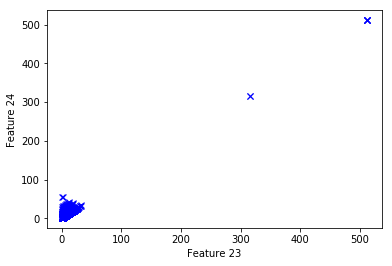

In [11]:
# 학습용 데이터를 plot
plt.figure()
plt.plot(x_train[:,23], x_train[:,24],"bx")
plt.xlabel("Feature 23")
plt.ylabel("Feature 24")
plt.show()

In [12]:
# 레이블 데이터만 따로 뽑아준다
y_train = x_train[:,42]
y_test = x_test[:,42]

In [13]:
# 컬럼 23,24의 데이터만 따로 추출한다
x_train = np.column_stack((x_train[:,23], x_train[:,24]))
x_test = np.column_stack((x_test[:,23], x_test[:,24]))

# 데이터를 np.array 형식으로 설정한다
x_train = np.array(x_train, dtype="int")
y_test = np.array(y_test, dtype="int")

In [25]:
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score  # recall , precision을 동시에 볼 수 있는 방법
from sklearn import mixture

def feature_normal(dataset):
    mu = np.mean(dataset, axis= 0)
    sigma = np.std(dataset, axis=0)
    return (dataset - mu) / sigma

# 가우시안의 평균 분산 값을 리턴하는 함수
def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma

# 실제 가우시안 그림을 만들어주는 함수
def multivariateGaussian(dataset, mu, sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

# 탐지의 기준이 되는 범위를 자동으로 선택해주는 함수
# f1_score를 사용해서 최적의 경계를 찾아준다
def selectThresholdByCV(probs, gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    stepsize = (max(probs) - min(probs)) / 10000;  # 10000은 하이퍼파라미터이다. 바꿔서 시도도 해보면 좋다
    epsilons = np.arange(min(probs), max(probs), stepsize)
    
    for epsilon in np.nditer(epsilons):
        predictions = (probs < epsilon)
        f = f1_score(gt, predictions, average = "binary")
        if f > best_f1:
            best_f1 = f
            best_epsilon = epsilon
    return best_f1, best_epsilon

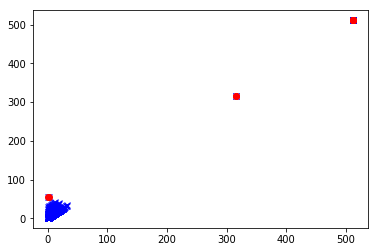

In [26]:
mu, sigma = estimateGaussian(x_train)
p = multivariateGaussian(x_train, mu, sigma)
p_t = multivariateGaussian(x_test, mu, sigma)

fscore, ep = selectThresholdByCV(p_t, y_test)

outliers = np.asarray(np.where( p < ep))

plt.figure()
plt.plot(x_train[:,0], x_train[:,1], "bx")
plt.plot(x_train[outliers, 0], x_train[outliers, 1], "ro")
plt.show()

mu